In [23]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Описание

Как и SVM, **деревья принятия решений** являются универсальным алгоритмом МО, который может решать как задачи классификации, так и задачи регрессии. Это очень мощный алгоритм, способный обучаться на сложном наборе данных.

Деревья принятия решений являются ключевым компонентом в построении **случайных лесов**.

# Классификация

Визуализировать дерево можно с помощью функции из `sklearn.tree` - `export_graphviz`. 

После создания файла **.dot** через командную строку необходимо использовать утилиту **dot**, чтобы привести файл в форма png.

In [24]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [25]:
iris = load_iris(as_frame=False)
X = iris['data'][:, :2]
y = iris['target']

In [26]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [27]:
from sklearn.tree import export_graphviz

export_graphviz(tree,
                out_file='iris_example.dot',
                feature_names=iris['feature_names'][:2],
                class_names=iris['target_names'], 
                filled=True, rounded=True)

In [28]:
!dot -Tpng iris_example.dot -o iris_example.png

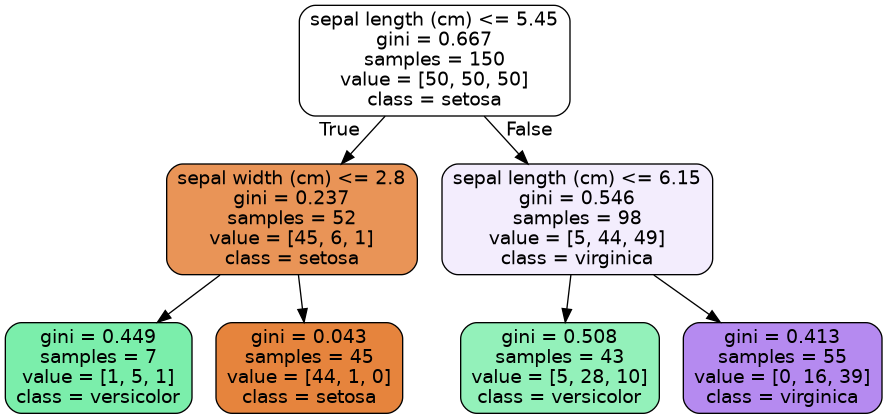

In [29]:
from IPython.display import Image

Image(data='iris_example.png')

Итак, посмотрим, как же дерево составляет свои прогнозы. Для определения класса, к которому относится Ирис, необходимо начать с **корневого узла** (глубина 0 - самый вверх): этот узел спрашивает насколько длина больше/меньше какого-то значения и, если оно удовлетворяет условию, то необходимо двигаться дальше влево или вправо в зависимости от условий.

Так нужно двигаться вплоть до **листового узла** - т.е. те, которые не имеют потомков.

**Gini** показывает меру **загрязненности**. Узел "чист" (gini=0), когда все образцы принадлежат одному классу. Формула для вычисления загрязненности gini:

$$G_i=1-\sum_{k=1}^np_{i,k}^2$$

К примеру, самый левый лист имеет загрязненность равную $1-(1/7)^2-(5/7)^2-(1/7)^2 = 0.449$.

При этом, $p_{i,k}$ показывает долю образцов $k$ класса в $i^{ом}$ узле.

Дерево принятия решений может также оценить вероятность того, что образец принадлежит конкретному классу $k$. Для начала необходимо произвести прогноз: пройти от корня дерева к его листу, а затем определить долю образцов, представляющих класс $k$, от всех образцов в узле.

In [30]:
tree.predict_proba([[5.48, 2.6]])

array([[0.11627907, 0.65116279, 0.23255814]])

# CART

Итак, Sklearn использует **алгоритм дерева классификации и регрессии** или **Classification and Regression Tree (CART)** алгоритм для построения и обучения деревьев.

Суть очень простая: алгоритм разделяет обучающий набор на два поднабора используя один признак $k$  и границу решений $t_k$ (ну к примеру, ширина ≤ 3.5m). Как же определить $k$ и $t_k$? Алгоритм ищет пару ($k, t_k$)  такую, чтобы разделить набор на чистые поднаборы, пытаясь минимизировать функцию потерь:

 

$$J(k, t_k)=\frac{m_{left}}mG_{left}+\frac{m_{right}}mG_{right}$$

где

$$G_{left/right}\ измеряет\ загрязненность\ левого/правого\  поднабора \\
m_{left/right} - количество\ образцов\ в\ левом/правом\ поднаборе$$

# Вычислительная сложность

Вычислительная сложность предсказания - $O(\log_2 m)$  
Вычислительная сложность построения дерева - $O(m\cdot n\log_2 m)$

# Визуализация

Давайте обучим классификатор на основе дерева принятия решений без каких-либо ограничений, чтобы посмотреть, как он составляет прогнозы.

In [31]:
tree = DecisionTreeClassifier()
tree.fit(X, y)

DecisionTreeClassifier()

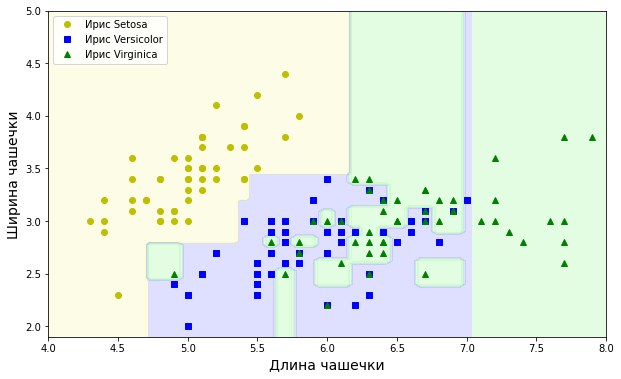

In [32]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(10, 6))

x1s = np.linspace(4, 8, 100)
x2s = np.linspace(1.9, 5, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = tree.predict(X_new).reshape(x1.shape)
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Ирис Setosa")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Ирис Versicolor")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Ирис Virginica")
plt.legend(loc='upper left')
plt.xlabel("Длина чашечки", fontsize=14)
plt.ylabel("Ширина чашечки", fontsize=14)

plt.show()

Можно заметить, как сильно переобучается дерево, если не применить к нему никакую регуляризацию. Можно попробовать изменить гиперпараметр **max_depth** и посмотреть как изменится картинка.

Логика регуляризации деревьев простая: увеличивая **min_*** гиперпараметры или уменьшая **max_*** гиперпараметры, можно регуляризовать модель.

# Регрессия

Деревья принятия решений также способны в задачу регрессии.

In [33]:
from sklearn.tree import DecisionTreeRegressor

m = 200
X = np.linspace(-3, 3, m).reshape(-1, 1)
y = 2 * X**2 + 0.5 * X + 6 + 2 * np.random.randn(m, 1)

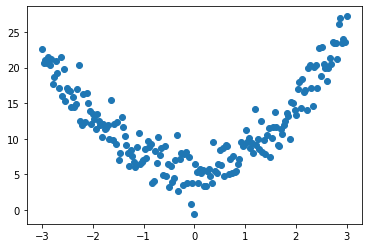

In [34]:
plt.scatter(X, y)
plt.show()

In [35]:
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [36]:
export_graphviz(tree,
                out_file='tree_regression.dot',
                filled=True, rounded=True)

In [37]:
!dot -Tpng tree_regression.dot -o tree_regression.png

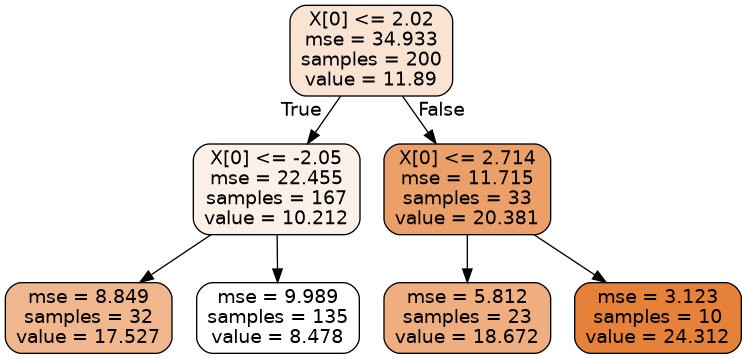

In [38]:
from IPython.display import Image

Image(data='tree_regression.png')

Дерево для регрессии очень похоже на дерево для классификации. Основное отличие в том, что вместо предсказанного класса в каждом узле стоит предсказанное значение. 

К примеру, если значение $x$ такое, что $x \le -2.111$, то значение **value** будет равно 18.049, что является средним значением 30 образцов, принадлежащие этому узлу, а их среднее mse - 10.794.

В случае регрессии CART строит дерево аналогично классификации, однако теперь вместо уменьшения загрязненности алгоритм старается уменьшить ошибку MSE.

$$J(k,t_k)=\frac{m_{left}}mMSE_{left}+\frac{m_{right}}mMSE_{right}$$

Теперь аналогично задача классификации посмотрим как строит прогнозы дерево в случае задачи регрессии. Сравнение проведем по параметру `max_depth`.

In [39]:
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X, y)

DecisionTreeRegressor(max_depth=2)

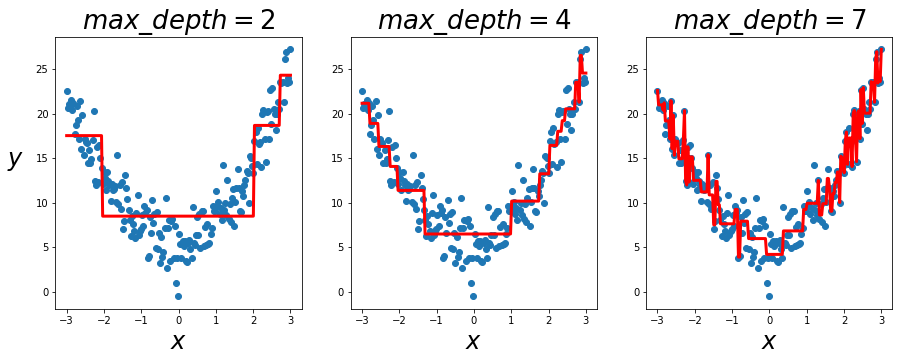

In [40]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(X, y)

tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X, y)
y_pred = tree.predict(X)
plt.plot(X, y_pred, 'r-', linewidth=3)
plt.title('$max\_depth=2$', fontsize=26)
plt.ylabel('$y$', fontsize=24, rotation=0, labelpad=20)
plt.xlabel('$x$', fontsize=24)

plt.subplot(132)
plt.scatter(X, y)

tree = DecisionTreeRegressor(max_depth=4)
tree.fit(X, y)
y_pred = tree.predict(X)
plt.plot(X, y_pred, 'r-', linewidth=3)
plt.title('$max\_depth=4$', fontsize=26)
plt.xlabel('$x$', fontsize=24)

plt.subplot(133)
plt.scatter(X, y)

tree = DecisionTreeRegressor(max_depth=7)
tree.fit(X, y)
y_pred = tree.predict(X)
plt.plot(X, y_pred, 'r-', linewidth=3)
plt.title('$max\_depth=7$', fontsize=26)
plt.xlabel('$x$', fontsize=24)
plt.show()

# Некоторые практические вещи

## Датасет Moons

Давайте попробуем посмотреть как будет выглядеть дерево для датасета `moons` изначально и после попробуем затюнить модель.

In [41]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=2000, noise=0.4)

Перед тем, как продолжить, разделим датасет на тренировочный и тестовый набор данных, чтобы впоследствие протестировать точность предсказания.

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [44]:
def plot_moons(X, y):
    ax = plt.gca()
    plt.scatter(X[:, 0][y==0], X[:, 1][y==0])
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1])
    plt.xlabel("$X_0$", fontsize=18)
    plt.ylabel("$X_1$", fontsize=18, rotation=0, labelpad=10)
    ax.tick_params(labelsize=14)

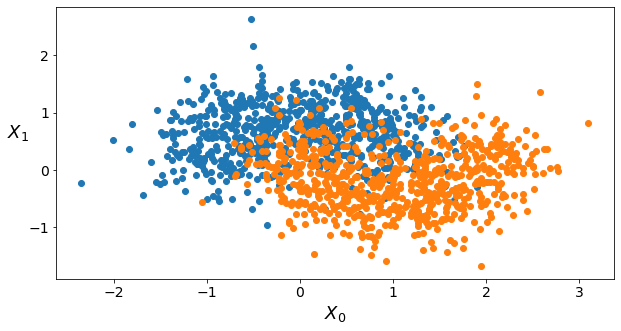

In [45]:
plt.figure(figsize=(10, 5))
plot_moons(X_train, y_train)
plt.show()

Теперь продемонстрируем, как дерево будет классифицировать указанный датасет.

In [66]:
def plot_tree_predictions(tree, axis):
    x1s = np.linspace(axis[0], axis[1], 100)
    x2s = np.linspace(axis[2], axis[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = tree.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#9494ff','#ff7e57'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    plt.axis(axis)

In [77]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

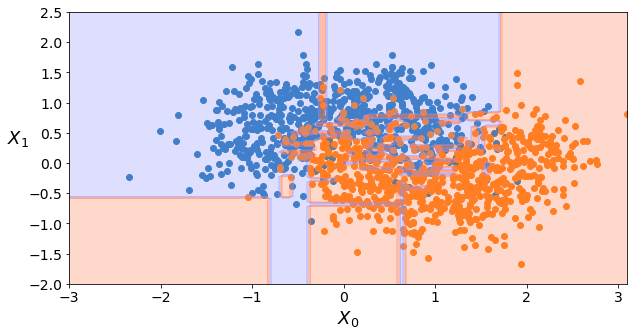

In [78]:
plt.figure(figsize=(10, 5))
plot_moons(X_train, y_train)
plot_tree_predictions(tree, [-3, 3.1, -2, 2.5])
plt.show()

Как можно заметить, дерево очень сильно переобучается. Для того, чтобы это подтвердить, достаточно посмотреть метрику `F1`.

In [82]:
f1_score(y_test, tree.predict(X_test))

0.8046357615894039

In [84]:
confusion_matrix(y_test, tree.predict(X_test))

array([[239,  62],
       [ 56, 243]])

А вот как картинка предсказания выглядит для тестовых данных.

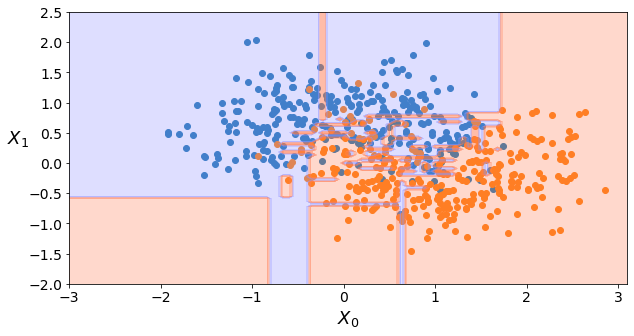

In [83]:
plt.figure(figsize=(10, 5))
plot_moons(X_test, y_test)
plot_tree_predictions(tree, [-3, 3.1, -2, 2.5])
plt.show()

Теперь давайте возьмем и затюним модель, подобрав её оптимальные гиперпараметры с помощью решётчатого поиска, а заодно посмотрим какие границы решения она построит и каков будет скор F1.

In [86]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2, 3, 4, 5, 6, 7],
     'min_samples_split': [2, 4, 6, 8, 10],
     'min_samples_leaf': [2, 4, 6, 8],
     'max_leaf_nodes': [None, 2, 4, 6, 8]}
]

In [91]:
gs = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 3, 4, 5, 6, 7],
                          'max_leaf_nodes': [None, 2, 4, 6, 8],
                          'min_samples_leaf': [2, 4, 6, 8],
                          'min_samples_split': [2, 4, 6, 8, 10],
                          'splitter': ['best', 'random']}],
             scoring='f1', verbose=1)

Как можно заметить метрика F1 сильно улучшилась, а границы принятия решения стали более регуляризованными.

In [98]:
gs.best_score_

0.8550728352190531

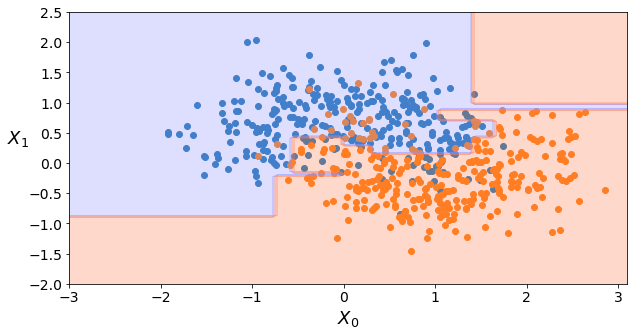

In [99]:
plt.figure(figsize=(10, 5))
plot_moons(X_test, y_test)
plot_tree_predictions(gs, [-3, 3.1, -2, 2.5])
plt.show()

In [100]:
f1_score(y_test, gs.predict(X_test))

0.8538205980066444

In [101]:
confusion_matrix(y_test, gs.predict(X_test))

array([[255,  46],
       [ 42, 257]])

## Случайный лес

На прошлом этапе мы нашли почти оптимальные параметры для дерева решений. Теперь попробуем построить случайный лес из кучи деревьев принятия решений.

Давайте разделим весь датасет на 100 случайных поднаборов, чтобы сразу обучить 100 деревьев на подобранных ранее оптимальных гиперпараметрах.

In [115]:
from sklearn.model_selection import ShuffleSplit
from sklearn.base import clone

In [123]:
forest = []
ss = ShuffleSplit(n_splits=100)

for train_index, test_index in ss.split(X_train, y_train):
    X_sub = X_train[train_index]
    y_sub = y_train[train_index]
    tree = DecisionTreeClassifier(**gs.best_params_)
    tree.fit(X_sub, y_sub)
    forest.append(tree)

Построенный лес содержит 100 деревьев, обученных на 100 случайных поднаборов обучающих данных.

In [124]:
len(forest)

100

Как можно заметить, каждое отдельное дерево имеет свои границы принятия решений.

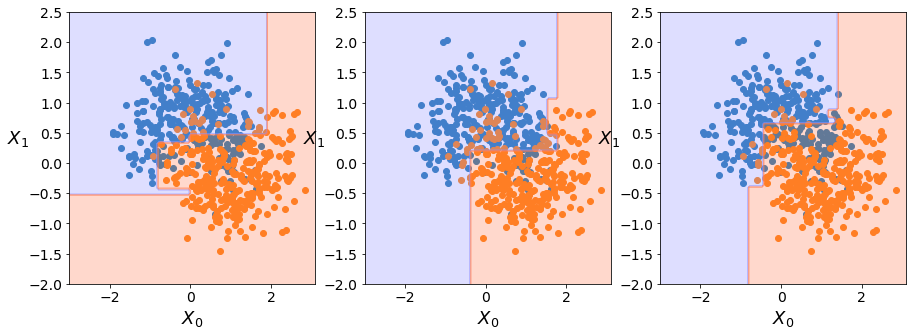

In [126]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plot_moons(X_test, y_test)
plot_tree_predictions(forest[0], [-3, 3.1, -2, 2.5])
plt.subplot(132)
plot_moons(X_test, y_test)
plot_tree_predictions(forest[50], [-3, 3.1, -2, 2.5])
plt.subplot(133)
plot_moons(X_test, y_test)
plot_tree_predictions(forest[99], [-3, 3.1, -2, 2.5])
plt.show()

Теперь возьмём все эти 100 деревьев и сделаем предсказания каждым деревом для тестового набора данных. А после с помощью статистической моды предскажем класс.

In [127]:
from scipy.stats import mode

In [129]:
y_pred = np.vstack([tree.predict(X_test) for tree in forest])
y_pred

array([[1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 1, 1, 0]])

`y_pred` содержит 100 деревьев и по каждому отдельному тестовому образцу сделано предсказание конкретным деревом.

In [141]:
mode_classes, _ = mode(y_pred, axis=0)
mode_classes = mode_classes.reshape(-1, 1)
mode_classes.shape

(600, 1)

In [142]:
f1_score(y_test, mode_classes)

0.8697123519458545

In [143]:
confusion_matrix(y_test, mode_classes)

array([[266,  35],
       [ 42, 257]])

Заметим, что точность целого случайного леса повысила на 2 десятых!